In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import FancyBboxPatch

In [4]:
df = pd.read_csv("ablation_studies_references_types_final.csv")

In [5]:
df["Category"]= df["Unnamed: 0"]

In [6]:
df

,Unnamed: 0,KG-present,KG-absent,TR,Category
0,- titles,-0.038444,-0.039398,-0.010184,- titles
1,- queries,-0.016809,-0.036513,-0.011368,- queries
2,- citation \ncontexts,-0.012942,-0.054966,-0.012661,- citation \ncontexts


In [7]:
categories = list(df["Category"])
kg_present = np.array(list(df["KG-present"])) * 100
kg_absent = np.array(list(df["KG-absent"]))*100
tr = np.array(list(df["TR"]))*100
# cls = np.array(list(df["CLS"]))*100

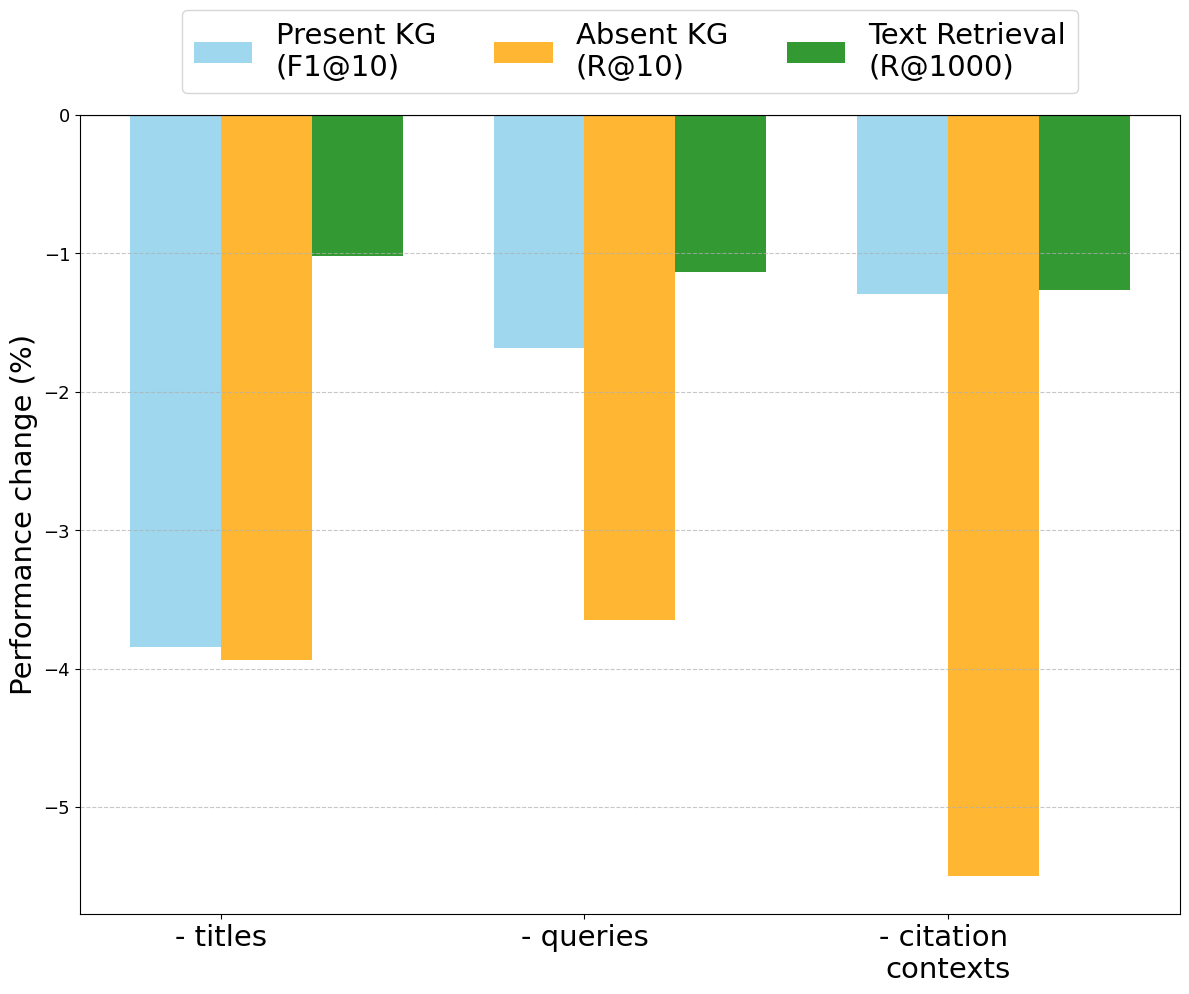

In [10]:
x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

# Create a figure and axis

fig, ax = plt.subplots(figsize=(12, 10))

# Plotting the bars with improved styling
bars1 = ax.bar(x - width, kg_present, width, label='Present KG\n(F1@10)', color='skyblue', alpha=0.8, align='edge')
bars2 = ax.bar(x, kg_absent, width, label='Absent KG\n(R@10)', color='orange', alpha=0.8, align='edge')
bars3 = ax.bar(x + width, tr, width, label='Text Retrieval\n(R@1000)', color='green', alpha=0.8, align='edge')
# bars4 = ax.bar(x + 2* width, cls, width, label='Classification', color='red', alpha=0.8, align='edge')

# Adding labels and title
# ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Performance change (%)', fontsize=21)
plt.yticks(fontsize=13)
# ax.set_title('Comparison of KG-present, KG-absent, and TR', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=21)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=21)

# Adjust y-axis range and add gridlines
# ax.set_ylim(-7, 2)  # Adjust based on your data range
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add horizontal line at y=0 for reference
ax.axhline(0, color='black', linewidth=0.8, alpha=0.85)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
fig.savefig("ablation_studies_references_types.pdf")